# Food Preference
In this project, we predict the food type of individuals. It can either be western food or tradition food.

In [ ]:
# Importing the needed libraries

!pip install shap
!pip install colorama

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
from colorama import Style, Fore, Back
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from joblib import dump

from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score

import shap
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

##Data Collection and loading

The data is a food survey conducted among participants from different countries and demography which can be found [here](https://www.kaggle.com/datasets/vijayashreer/food-preferences)

In [2]:
# reading the data
data = pd.read_csv('/content/drive/MyDrive/Datasets/Food_Preference.csv')
# data = pd.read_csv('./dataset/Food_Preference.csv')

In [3]:
#Displaying the first five rows of the data
data.head()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
0,2019/05/07 2:59:13 PM GMT+8,FPS001,Male,Indian,24,Traditional food,Fresh Juice,Maybe
1,2019/05/07 2:59:45 PM GMT+8,FPS002,Female,Indian,22,Western Food,Carbonated drinks,Yes
2,2019/05/07 3:00:05 PM GMT+8,FPS003,Male,Indian,31,Western Food,Fresh Juice,Maybe
3,2019/05/07 3:00:11 PM GMT+8,FPS004,Female,Indian,25,Traditional food,Fresh Juice,Maybe
4,2019/05/07 3:02:50 PM GMT+8,FPS005,Male,Indian,27,Traditional food,Fresh Juice,Maybe


In [ ]:
#Displaying the last five rows of the data
data.tail()

,Timestamp,Participant_ID,Gender,Nationality,Age,Food,Juice,Dessert
283,2019/05/10 9:24:00 AM GMT+8,FPS284,Male,Indian,27,Western Food,Fresh Juice,Yes
284,2019/05/10 9:32:54 AM GMT+8,FPS285,Male,Indian,24,Traditional food,Fresh Juice,Yes
285,2019/05/10 12:09:17 PM GMT+8,FPS286,Male,Indian,25,Traditional food,Fresh Juice,Yes
286,2019/05/10 12:52:17 PM GMT+8,FPS287,Male,Indian,27,Traditional food,Fresh Juice,Yes
287,2019/05/10 12:55:42 PM GMT+8,FPS288,Male,Indian,27,Traditional food,Fresh Juice,No


In [ ]:
data.columns

Index(['Timestamp', 'Participant_ID', 'Gender', 'Nationality', 'Age', 'Food',
       'Juice', 'Dessert'],
      dtype='object')

In [4]:
# Renaming the column
data.columns = ['timestamp', 'participant_id', 'gender', 'nationality', 'age', 'food',
       'juice', 'dessert']

## Exploratory Data Analysis

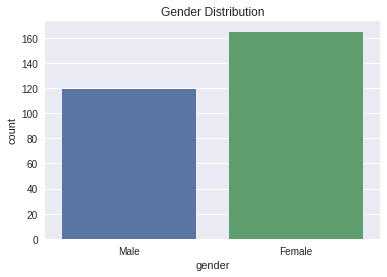

In [5]:
sns.countplot(data['gender']).set_title("Gender Distribution")
plt.show()

- The highest gender observation is **Female**

In [ ]:
data['dessert'].unique()

array(['Maybe', 'Yes', 'No'], dtype=object)

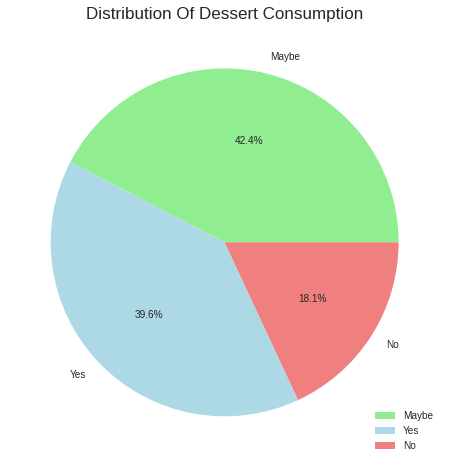

In [6]:
plt.figure(figsize = (8, 8))
plt.pie(data['dessert'].value_counts(), colors = ['lightgreen', 'lightblue','lightcoral'], 
        labels = ['Maybe', 'Yes','No'], autopct = '%.1f%%')
plt.title('Distribution Of Dessert Consumption', fontsize = 17)
plt.axis('off')
plt.legend()
plt.show()

- We can conclude that most of the people consume desserts

In [ ]:
print(f"The total number of observation recorded is {data['participant_id'].nunique()}")

The total number of observation recorded is 288


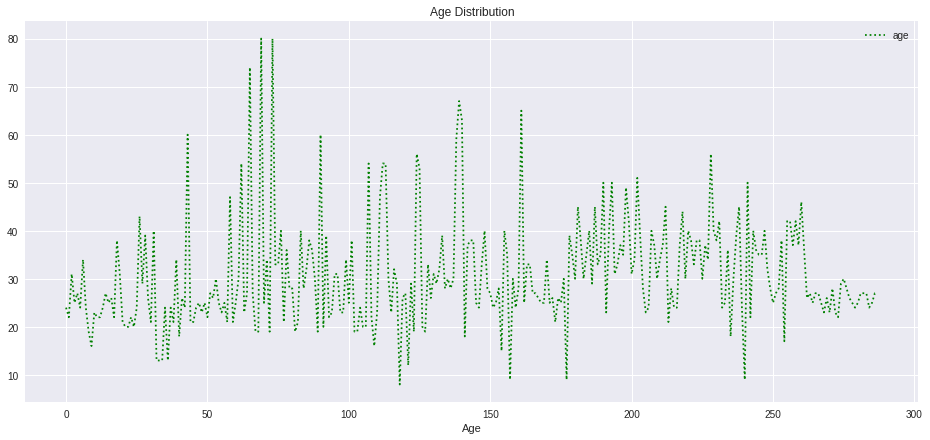

In [8]:
plt.figure(figsize = (16, 7))
plt.plot(data['age'], label = 'age', linestyle = ':', color = 'green')
plt.title("Age Distribution")
plt.xlabel("Age Range")
plt.legend()
plt.show()

In [9]:
data.columns

Index(['timestamp', 'participant_id', 'gender', 'nationality', 'age', 'food',
       'juice', 'dessert'],
      dtype='object')

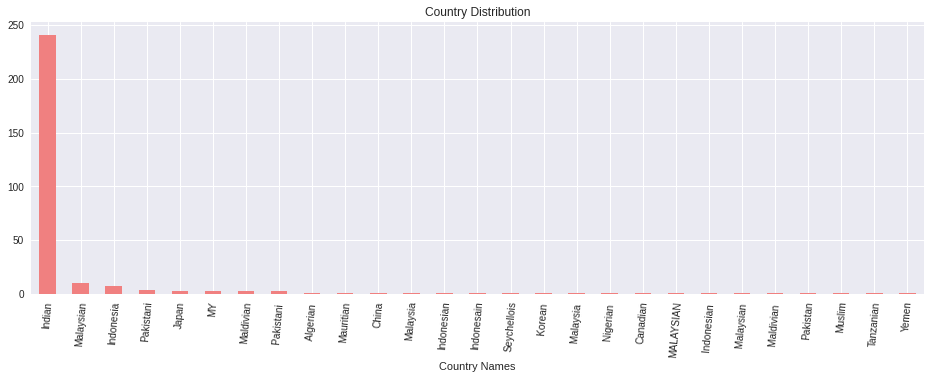

In [24]:
plt.figure(figsize = (16, 5))
data['nationality'].value_counts().plot(kind = 'bar', title = 'Country Distribution', color = 'lightcoral')
plt.xticks(rotation = 85)
plt.xlabel('Country Names')
plt.show()